In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [29]:
df = pd.read_csv("Mall_Customers.csv")

In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [23]:
df.shape

(200, 5)

In [24]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [25]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

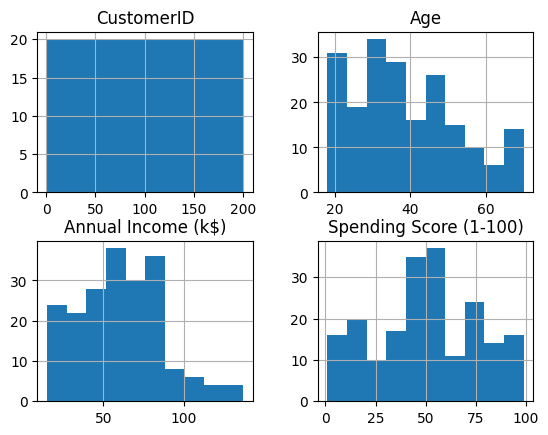

In [26]:
df.hist()
plt.show()


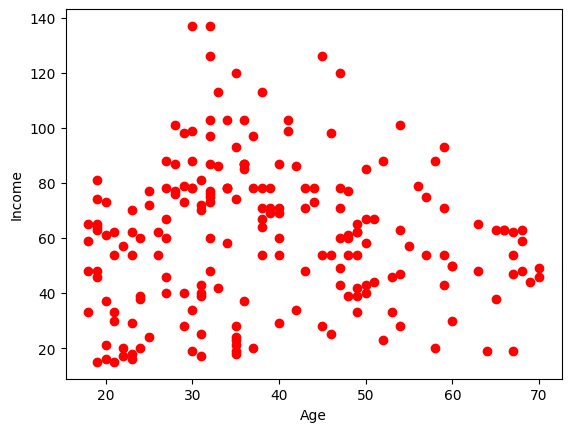

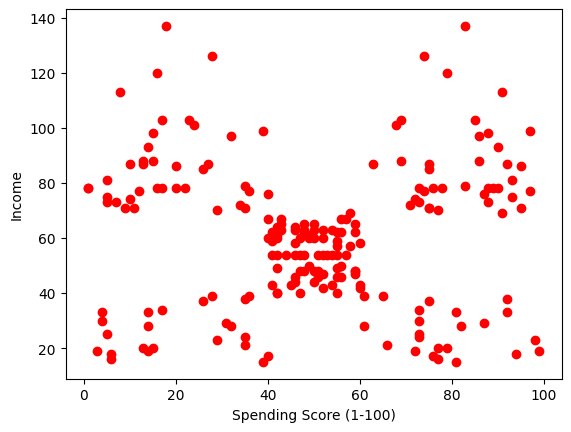

In [31]:

for i in df[['Age','Spending Score (1-100)']]:
    plt.scatter(df[i],df['Annual Income (k$)'],color='red')
    plt.xlabel(i)
    plt.ylabel("Income")
    plt.show()

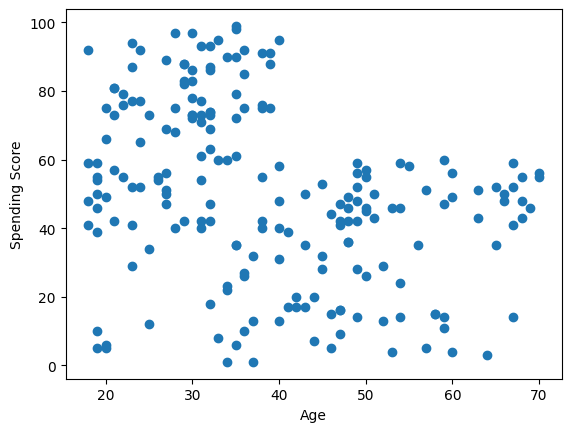

In [33]:

plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()


In [37]:
relevant_cols = ["Age", "Annual Income (k$)", 
                 "Spending Score (1-100)"]

customer_df = df[relevant_cols]

customer_df


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


#### finding the perfect value of  k using elbow method

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(customer_df)

scaled_data = scaler.transform(customer_df)


In [39]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values


In [40]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

In [41]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()


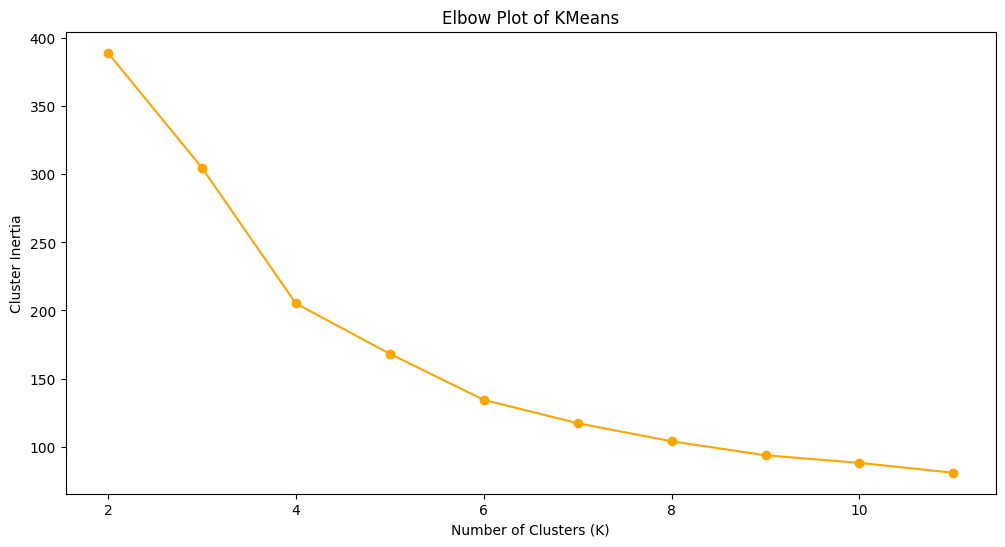

In [42]:
generate_elbow_plot(clusters_centers, k_values)


***form elbow method we can clearly see that k =5 is best or optimal no of cluster to be created***

### creating cluster as K =5

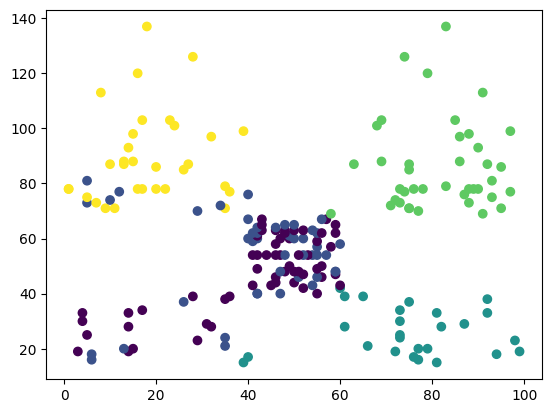

In [43]:
kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

df["clusters"] = kmeans_model.labels_

plt.scatter(df["Spending Score (1-100)"], 
            df["Annual Income (k$)"], 
            c = df["clusters"]
            )


### Customers on the top left have a low spending score and a high annual income. A good marketing strategy could be implemented to target those customers so that they can spend more.

#### On the other hand, customers on the bottom left have a low annual income and also spends less, which makes sense, because they are trying to adjust their spending habit to their budget.
#### The top right customers are similar to the bottom left, the difference is that they have enough budget to spend.
#### Finally, the  grreen group of customers spends beyond their budget.


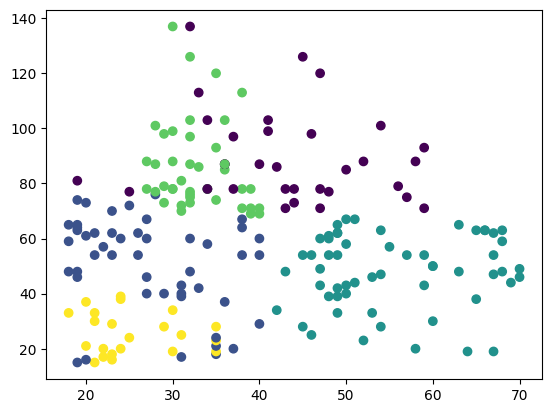

In [47]:
kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

df["clusters"] = kmeans_model.labels_

plt.scatter(df["Age"], 
            df["Annual Income (k$)"], 
            c = df["clusters"]
            )
